In [1]:
import pandas as pd
import numpy as np
from __future__ import absolute_import, division, print_function
from six.moves import range
import biosppy.signals.eda as eda
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
data = []
for i in range(1, 31):
    filename = f"P1-V{i}.csv"
    data.append(pd.read_csv(filename))

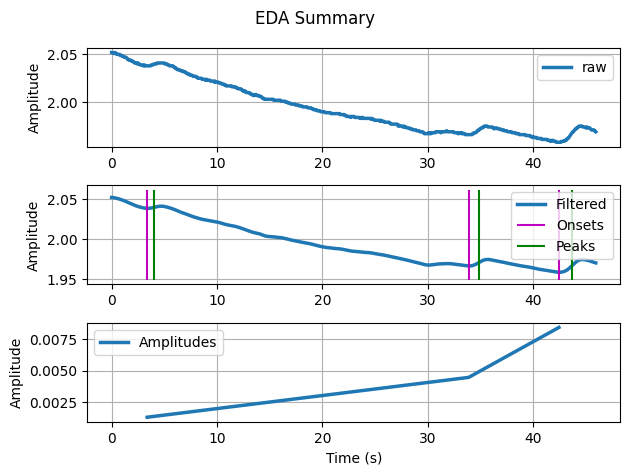

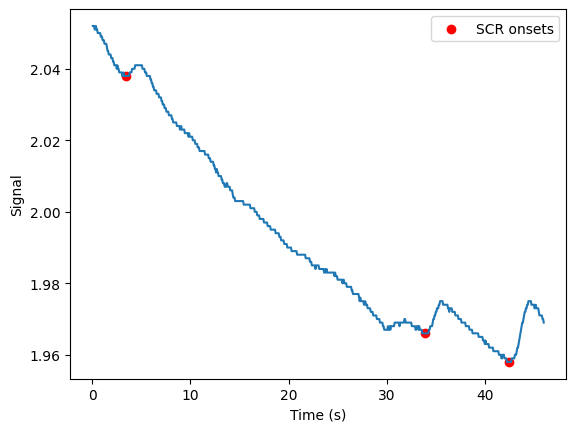

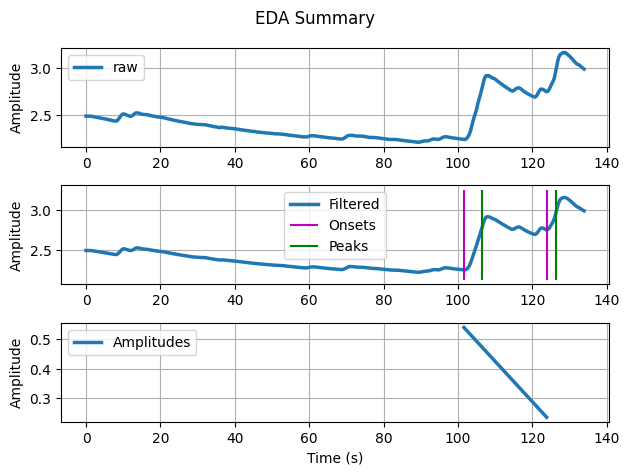

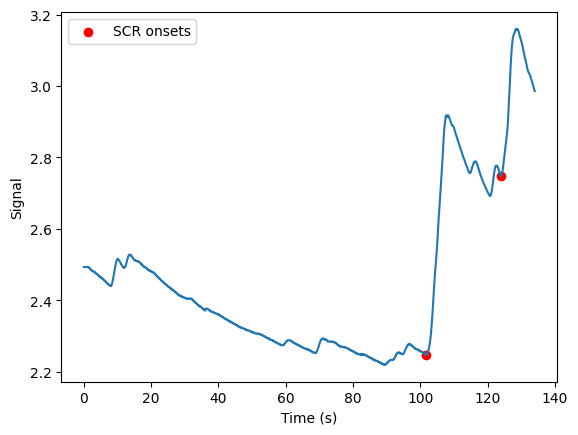

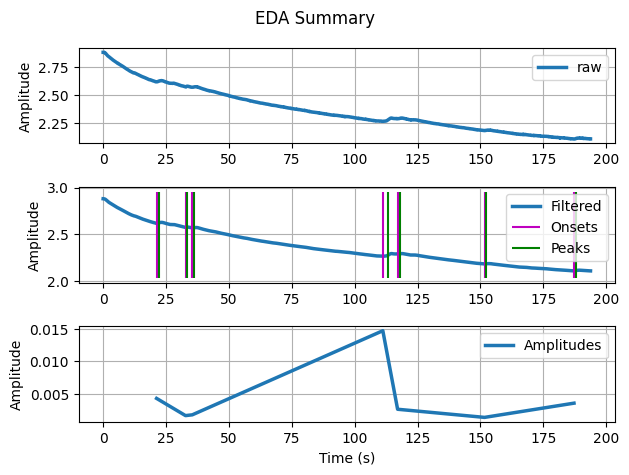

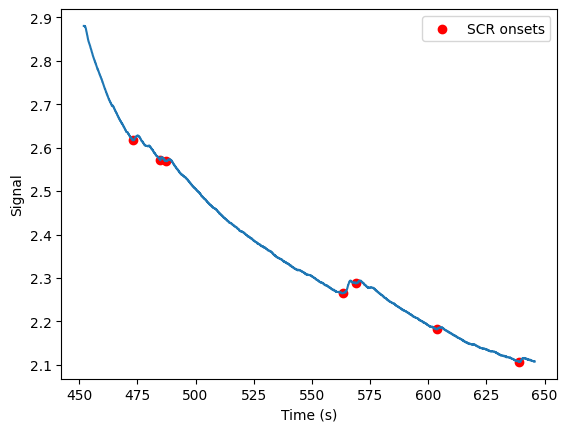

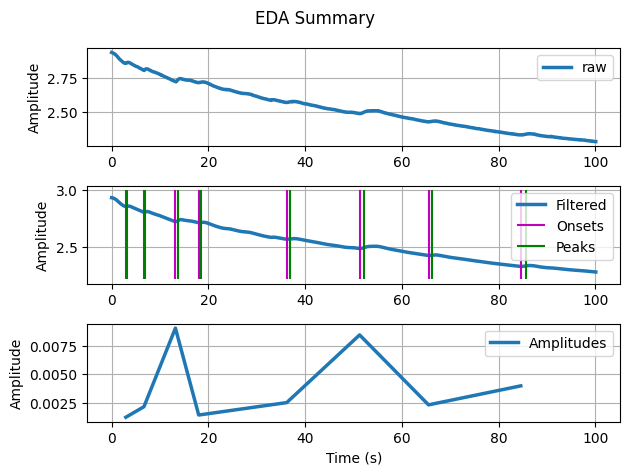

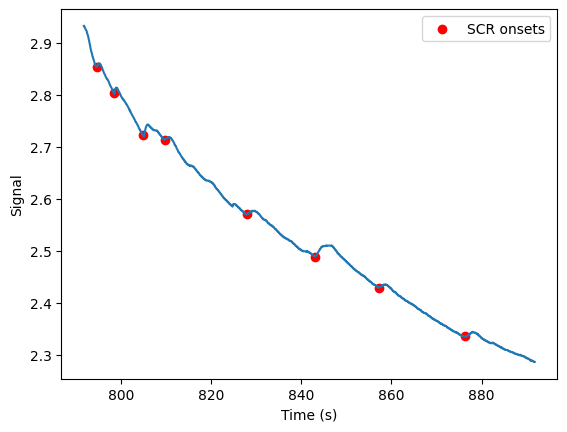

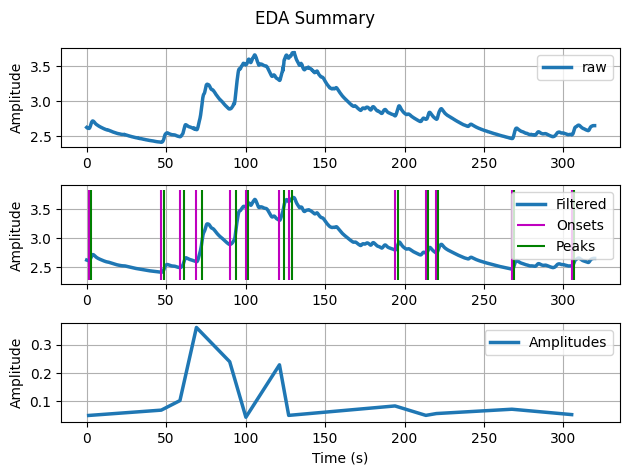

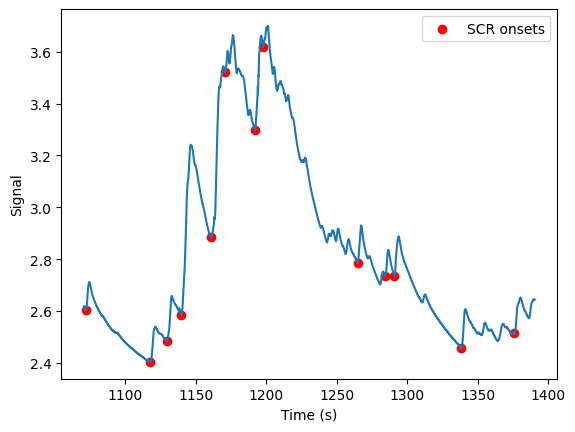

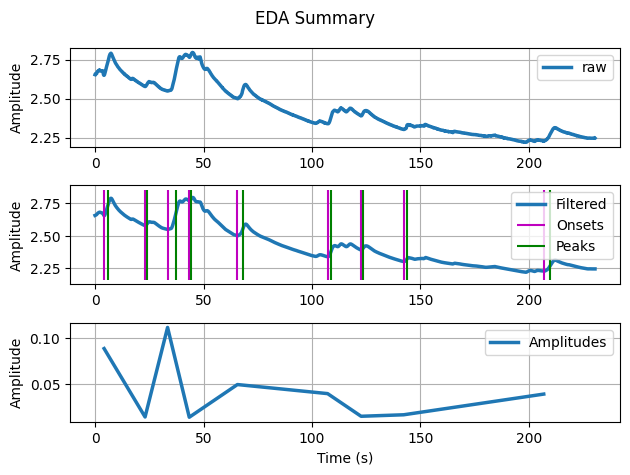

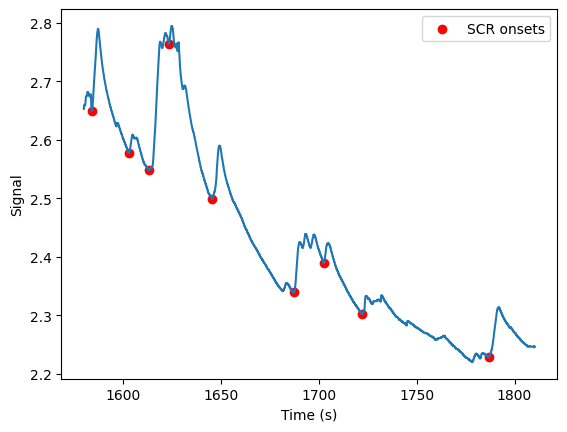

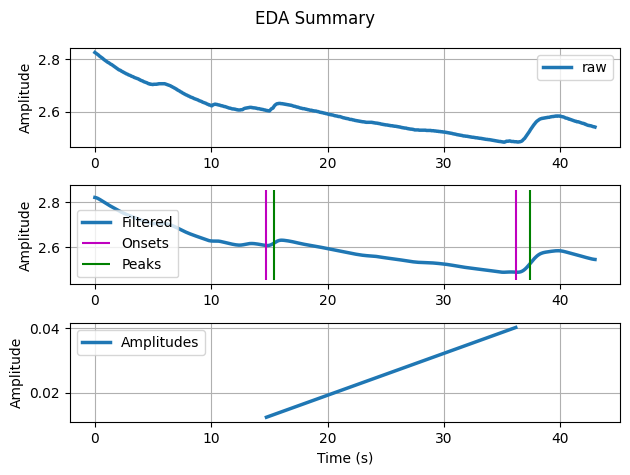

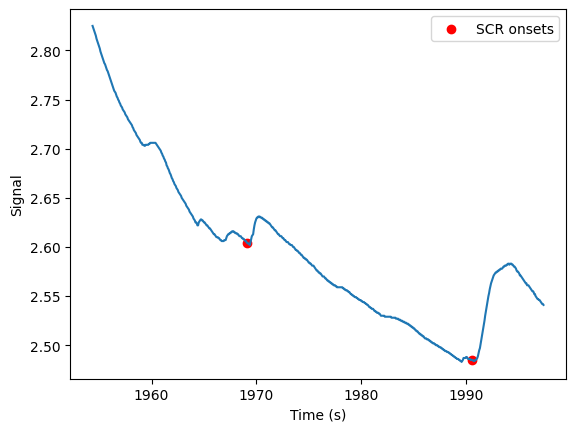

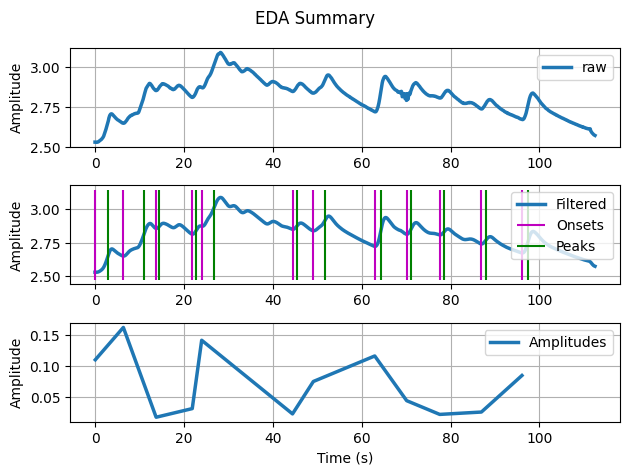

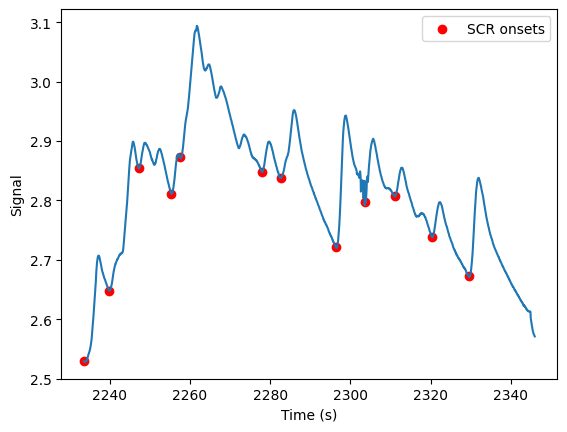

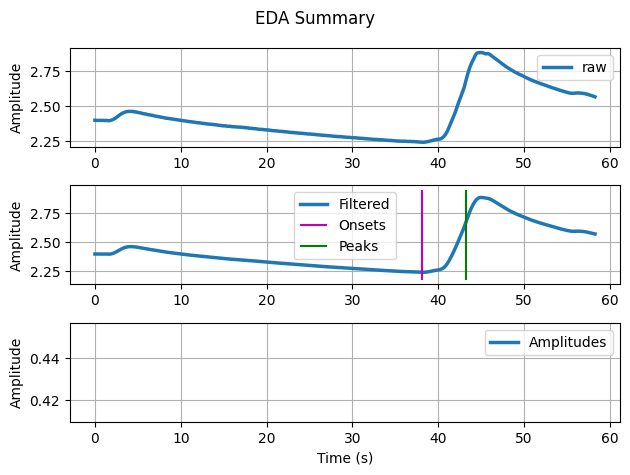

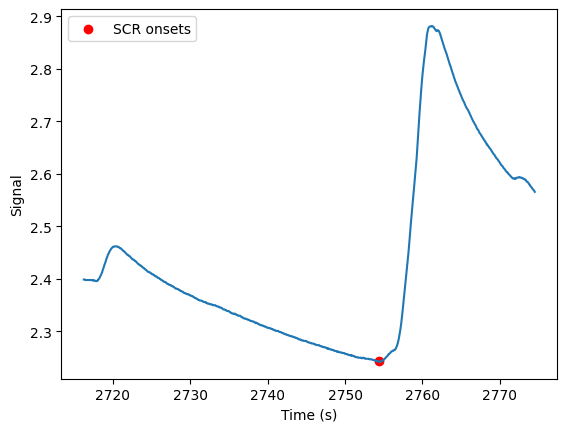

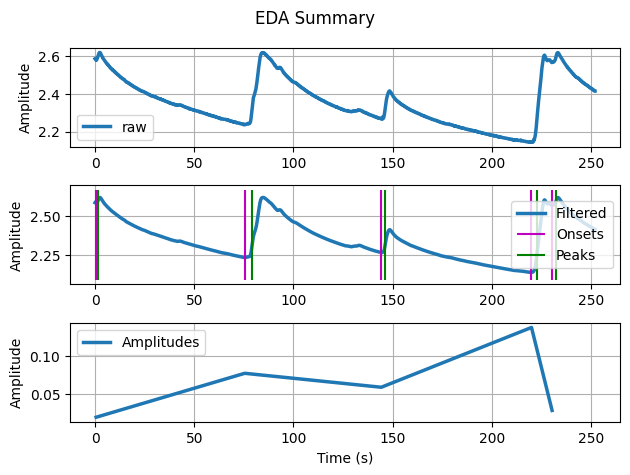

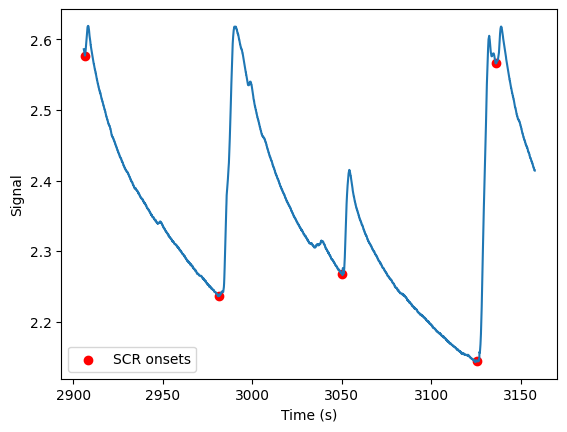

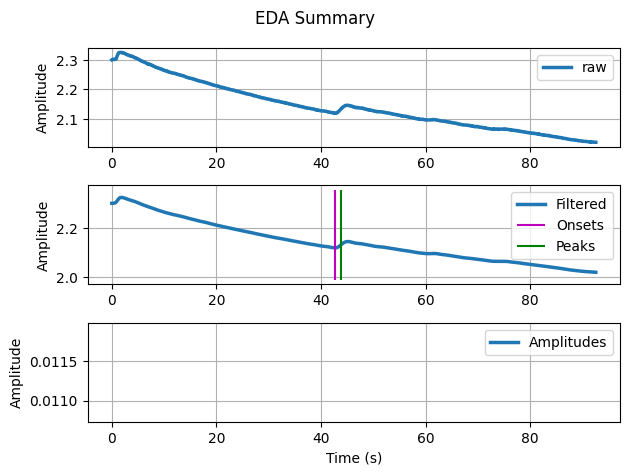

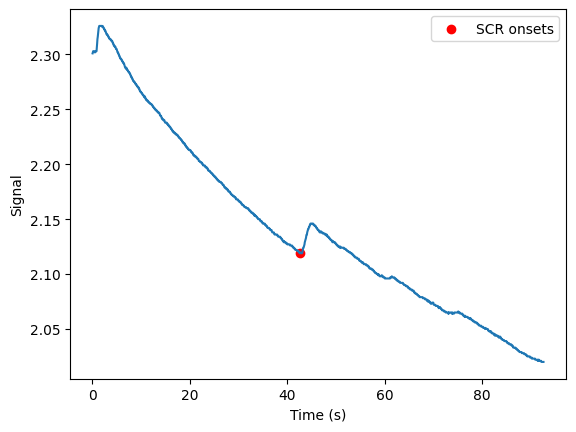

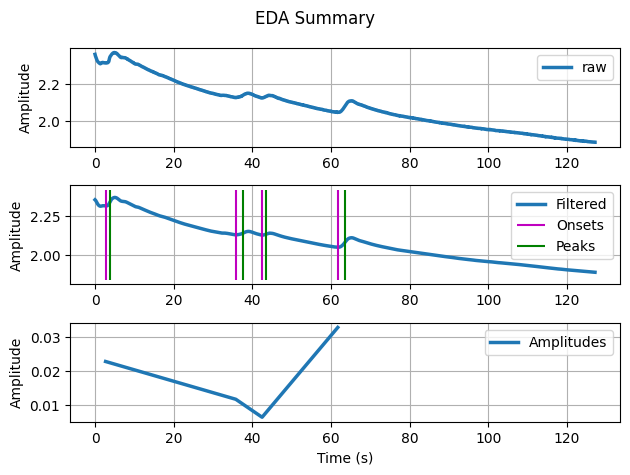

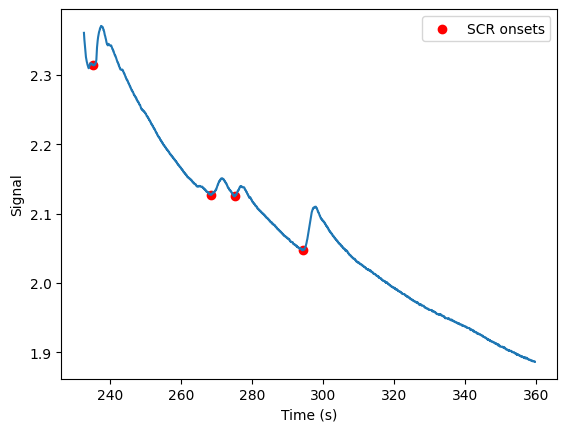

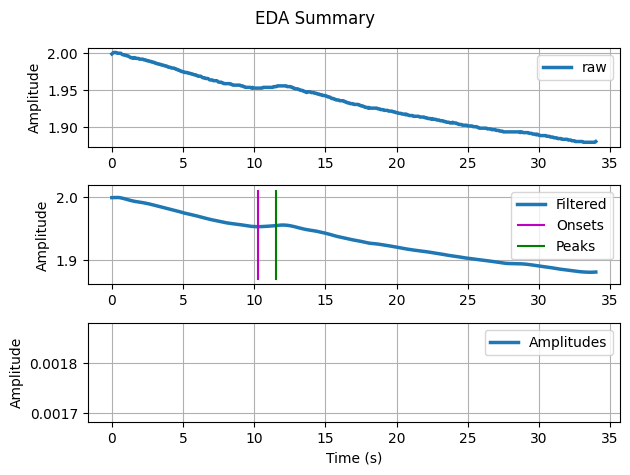

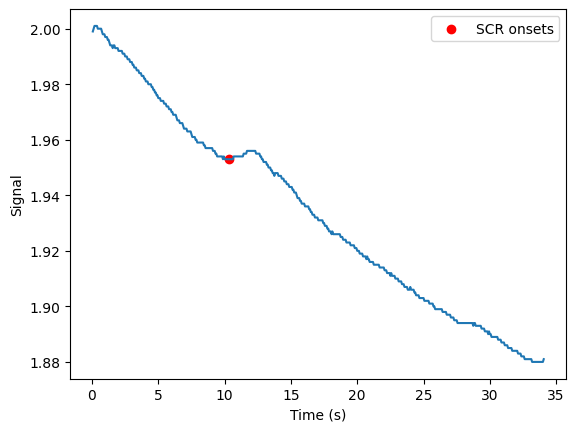

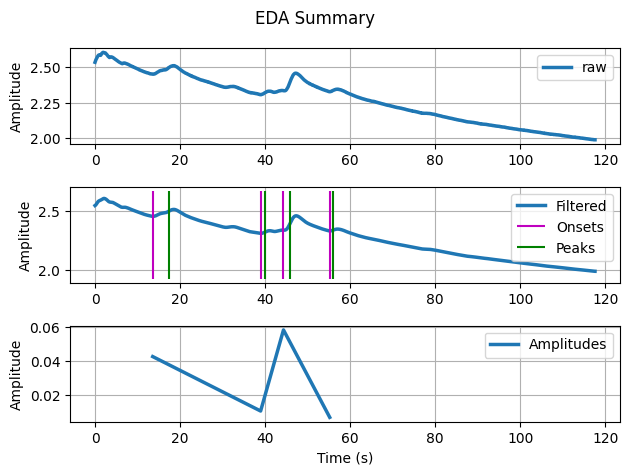

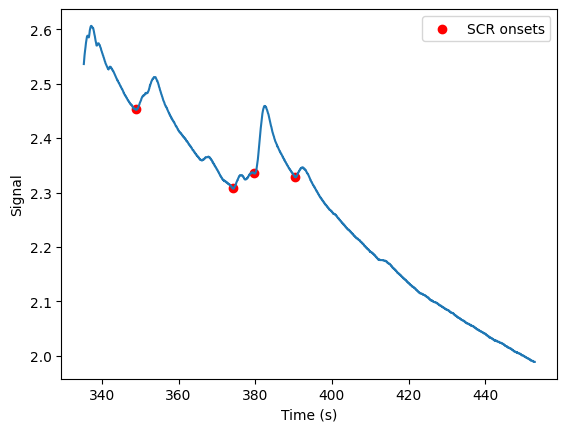

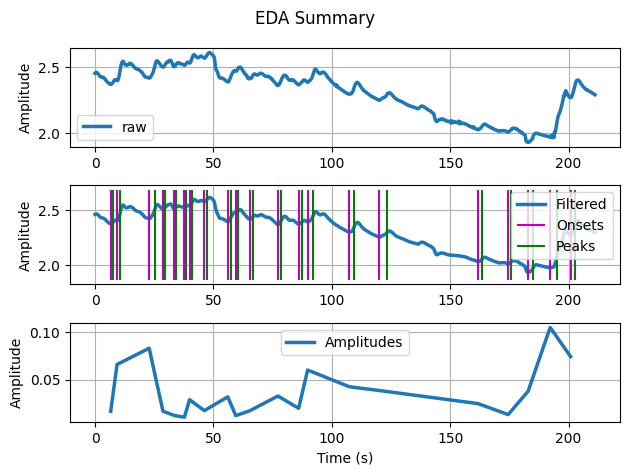

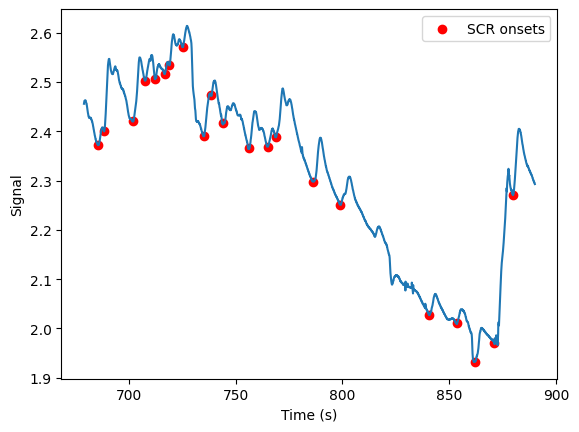

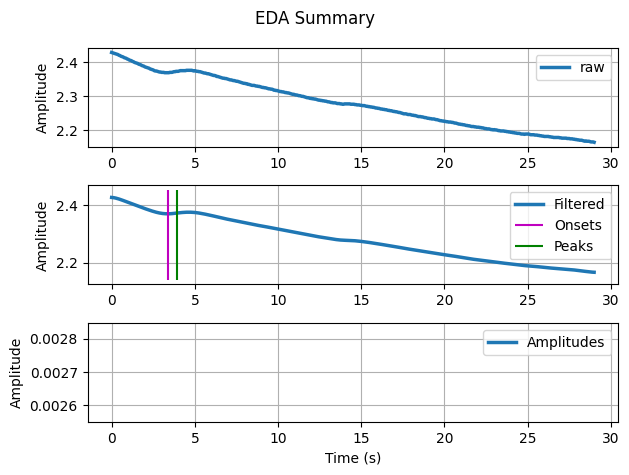

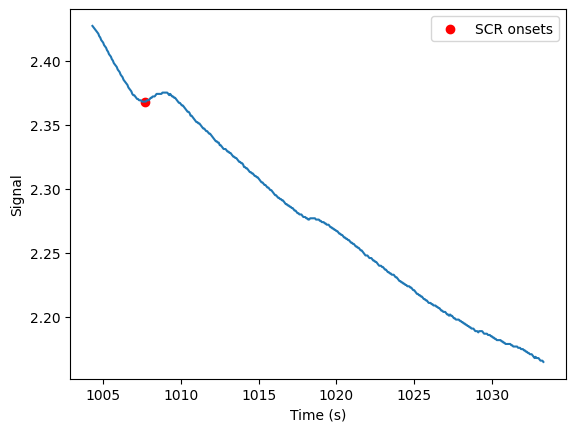

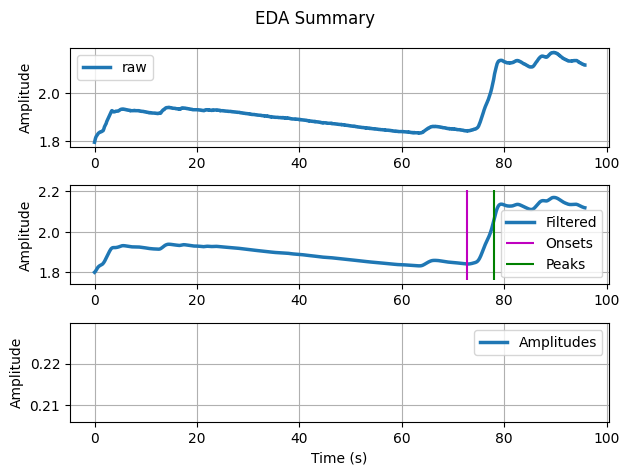

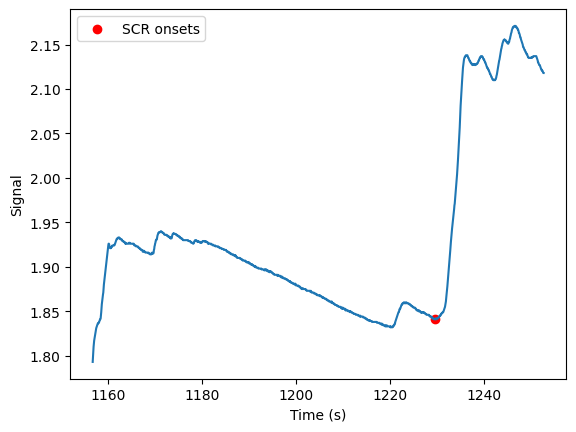

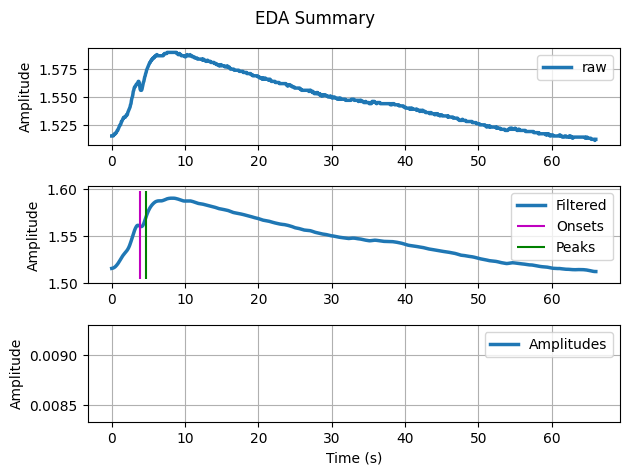

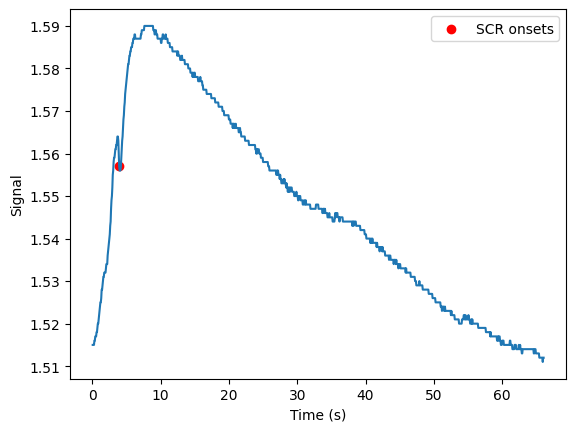

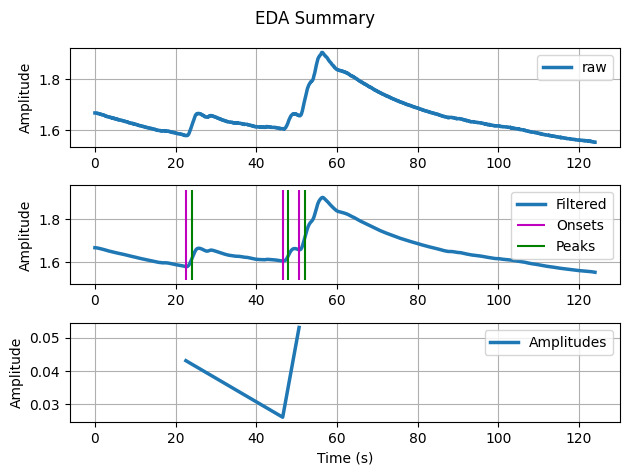

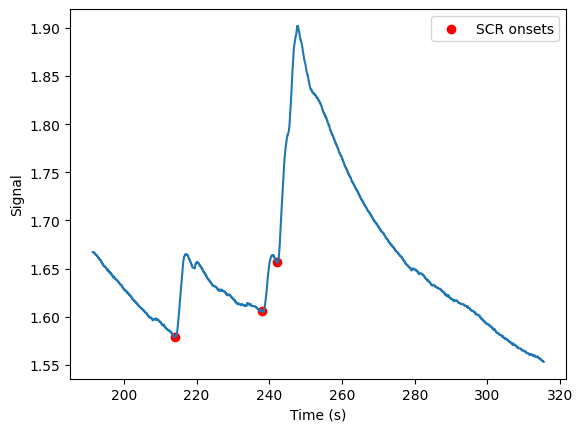

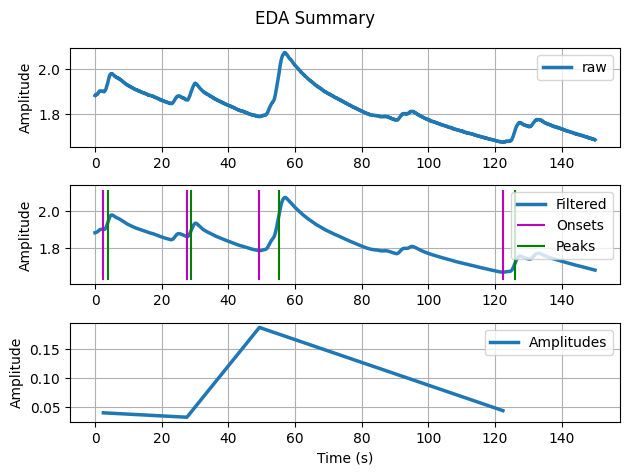

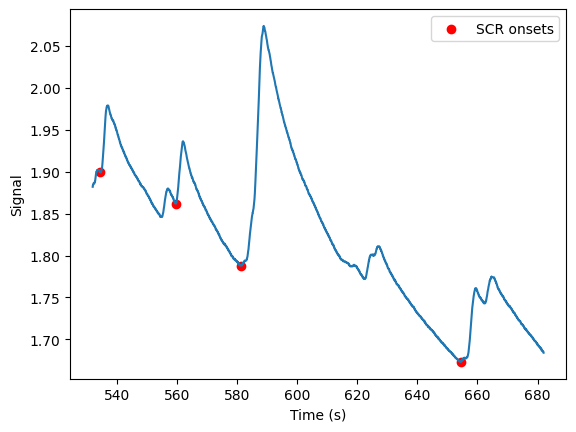

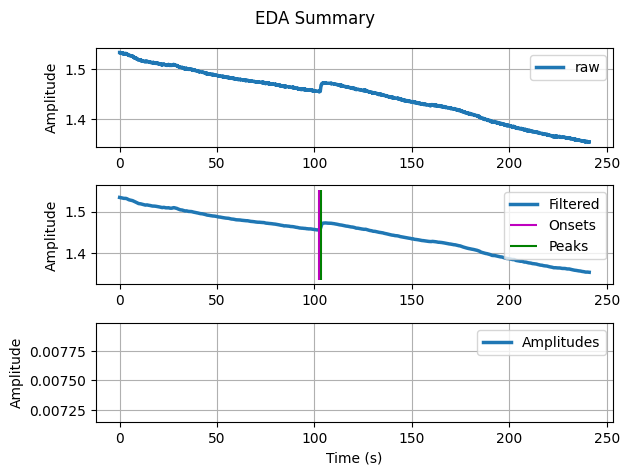

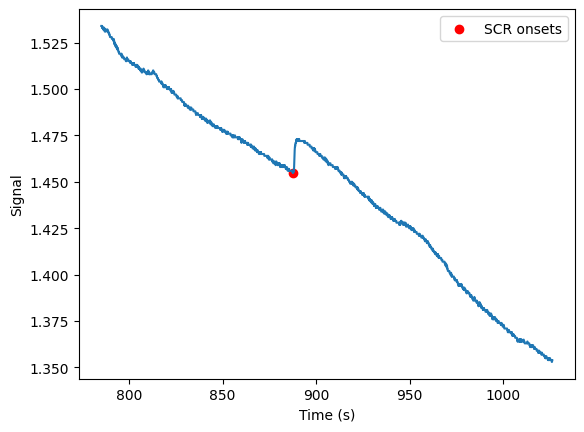

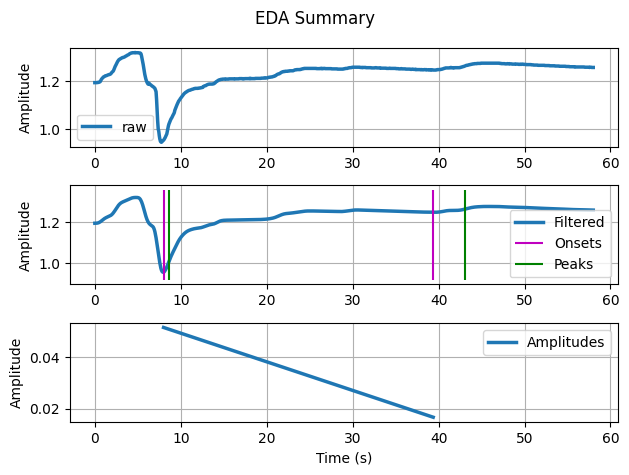

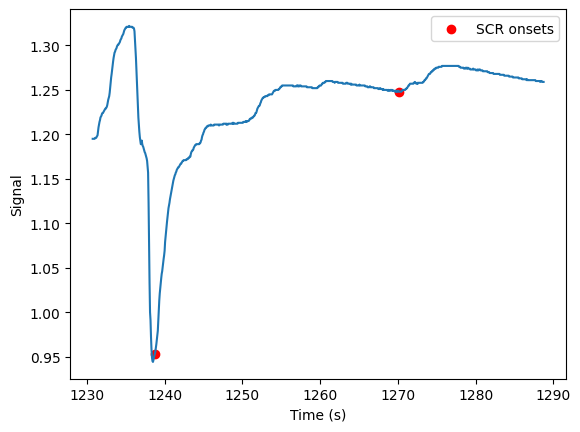

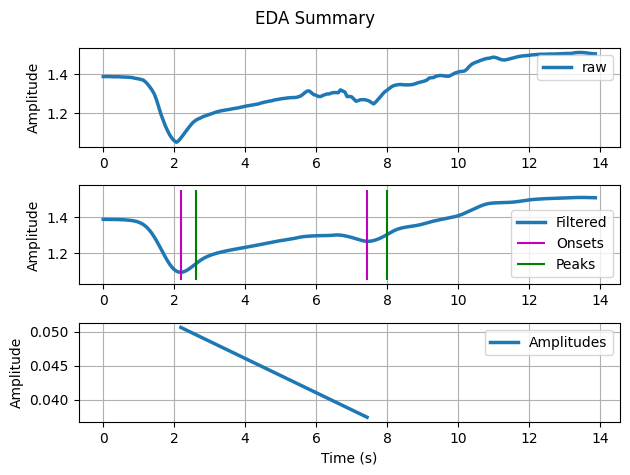

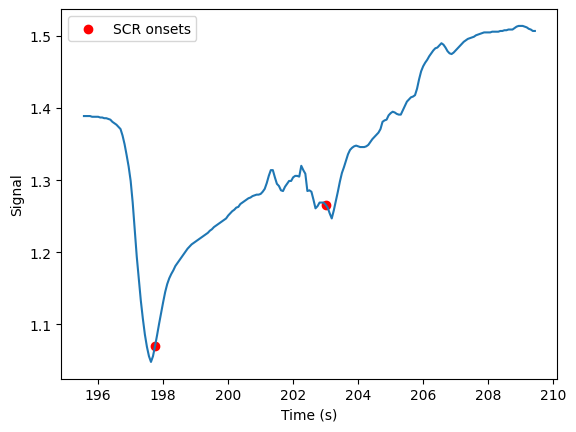

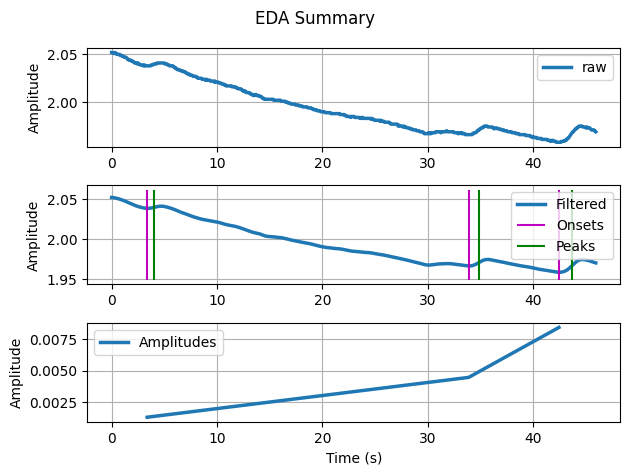

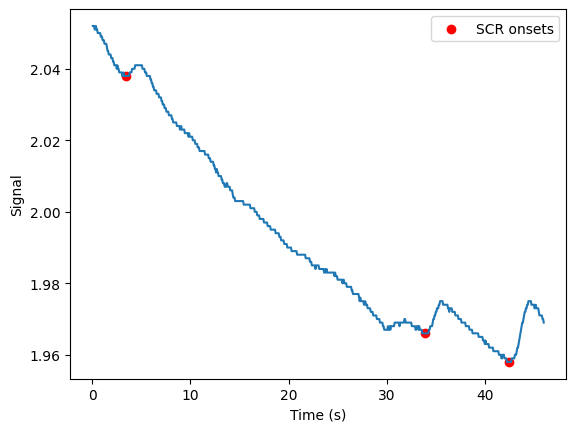

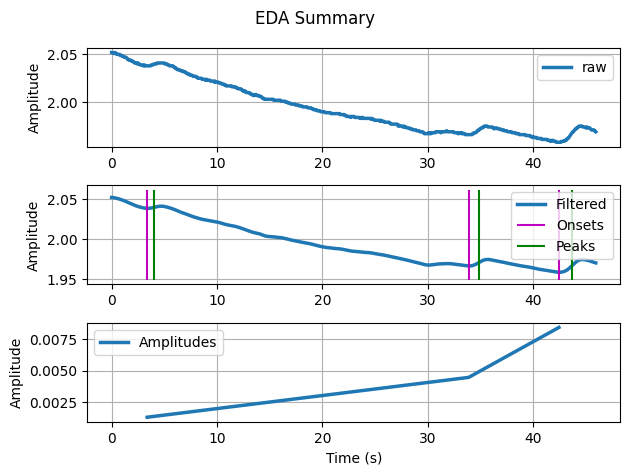

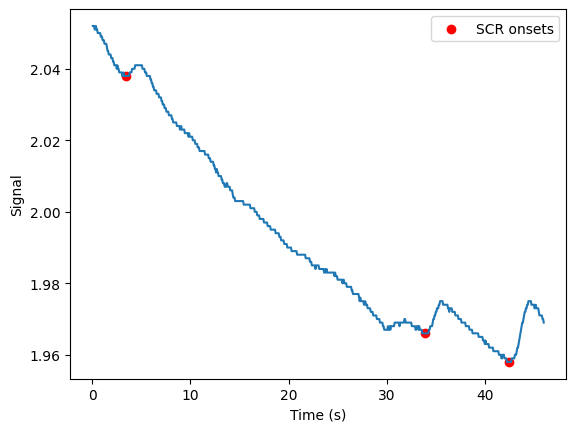

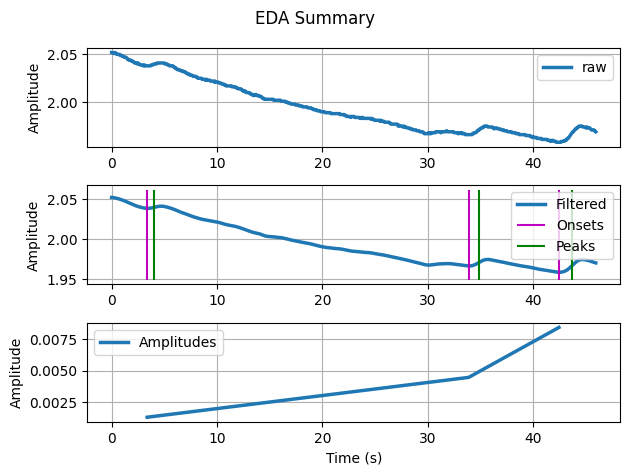

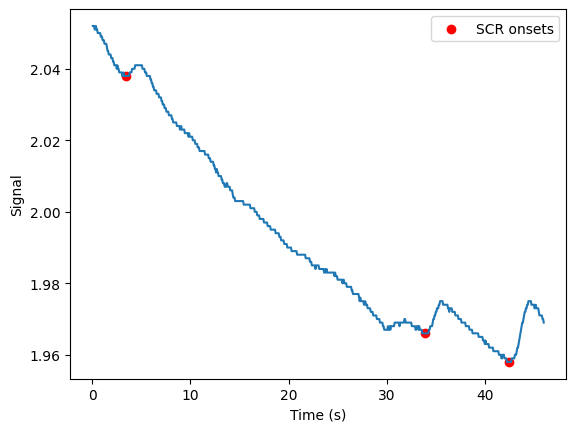

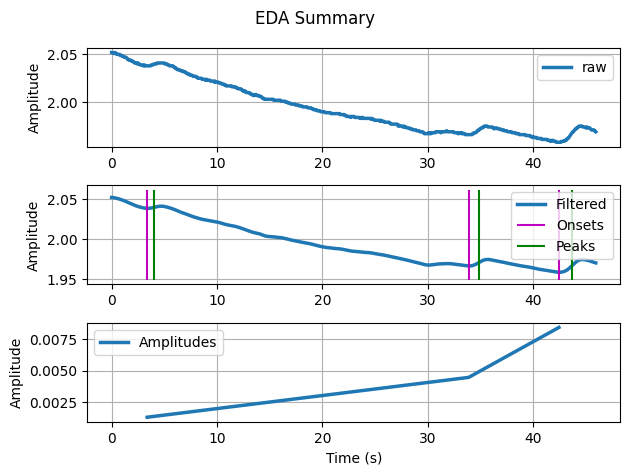

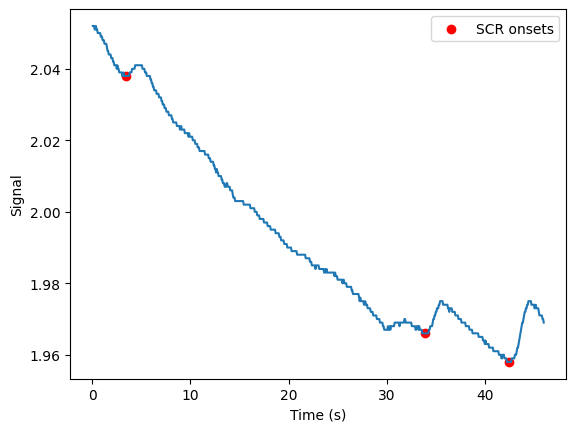

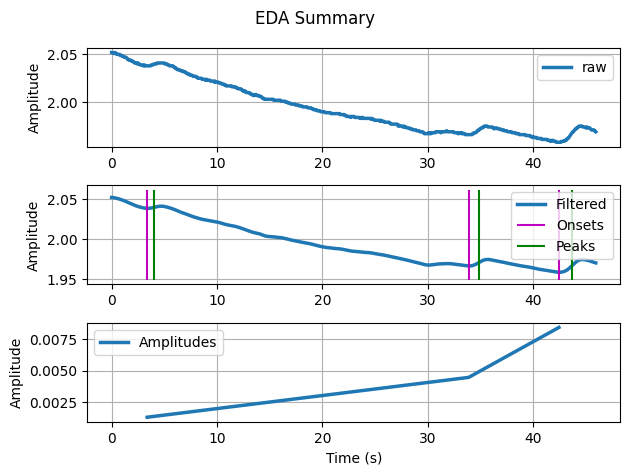

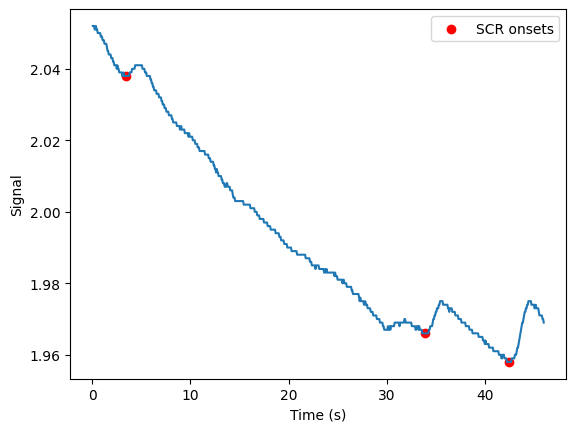

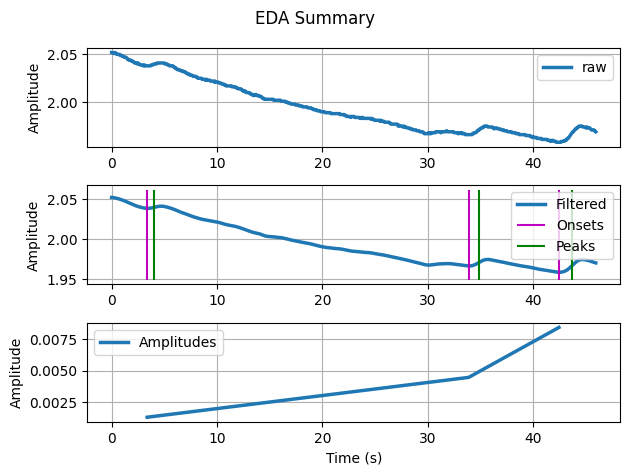

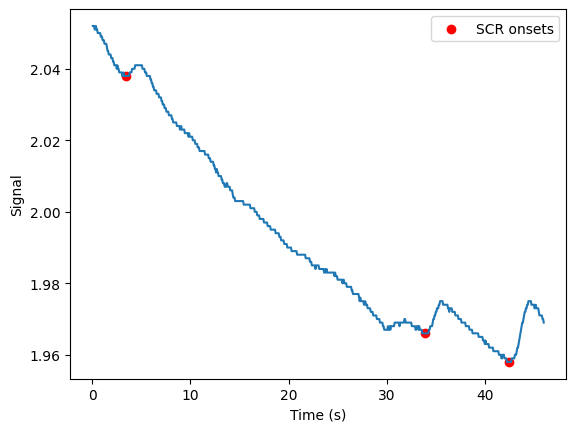

In [7]:
fs= 16
error_list = []
scr_len = []
eda_list = []
t_list = []
for i in range(len(data)):
    t = data[i]["Time"].to_numpy()
    t_list.append(t)
    eda_signal = data[i]["C : SC"].to_numpy()
    eda_list.append(eda_signal)
    try:
        scr = eda.eda(signal=eda_signal, sampling_rate=fs)
        plt.plot(t, eda_signal)
        plt.scatter(t[scr['onsets']], eda_signal[scr['onsets']], c='r', label='SCR onsets')
        plt.xlabel('Time (s)')
        plt.ylabel('Signal')
        plt.legend()
        plt.savefig(f"LoveDaHye{i+1}.png")
        plt.show()
        scr_len.append(len(scr["onsets"]))
    except:
        error_list.append({i+1})
        scr_len.append(None)

In [4]:
#抓第幾個檔案有問題，不想知道整個註記掉
for i in range (len(error_list)):
    print(f"第{error_list[i]}個檔案有問題")

第{23}個檔案有問題


In [5]:
lowcut = 0.05  # Low-frequency cutoff in Hz
highcut = 5.0  # High-frequency cutoff in Hz
order = 4  # Filter order

In [6]:
freq_list = []

b, a = signal.butter(order, [lowcut, highcut], btype='bandpass', fs=fs)

for i in range (len(data)):
    eda_signal_filtered = signal.filtfilt(b, a, eda_list[i])
    onsets, peaks, amplitudes= eda.basic_scr(eda_signal_filtered, sampling_rate=fs)

    freq = 1 / np.mean(np.diff(onsets))
    freq_list.append(round(freq,2))
#print(f"The frequency of the skin conductance responses is {freq:.2f} Hz") #這個也要存

In [8]:
data_final = {"number of onset": scr_len, "Hz": freq_list}
df = pd.DataFrame(data_final)

df.insert(0, "NO", range(1, len(df) + 1))

with pd.ExcelWriter("Da_hye_electrodermal.xlsx") as writer:
    df.to_excel(writer, index=False)

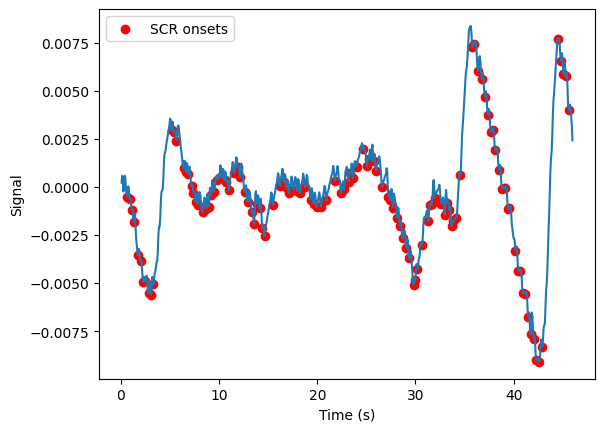

In [39]:
#我沒修 
plt.plot(t, eda_signal_filtered)
plt.scatter(t[onsets], eda_signal_filtered[onsets], c='r', label='SCR onsets')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.legend()
plt.show()